#Import Library yang Diperlukan

In [ ]:
# Library untuk data analysis dan data visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Library untuk datra prepocessing
from sklearn.preprocessing import MinMaxScaler

# Library untuk hierarchical clustering
import scipy
import pylab
import scipy.cluster.hierarchy
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import fcluster

# Library untuk mengabaikan warnings
import warnings
warnings.filterwarnings('ignore')

#Load Dataset dari Google Drive

In [ ]:
#Import drive
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Load dataset
df = pd.read_csv('/content/gdrive/MyDrive/dataset/Country-data.csv')
df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


#Data Understanding

In [ ]:
#Jumlah baris dan kolom pada dataset
df.shape

(167, 10)

In [ ]:
#Melihat kolom dan tipe data
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [ ]:
#Describe data
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Exploratory Data Analysis

In [ ]:
#Memisahkan kolom dengan tipe data numerical
num_col = (df.columns).to_list()
num_col = num_col[1:]

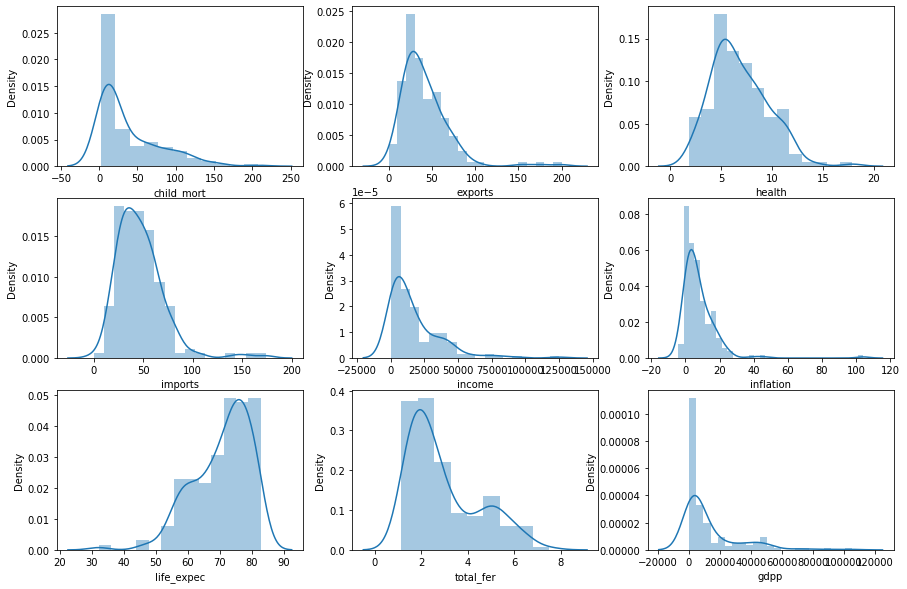

In [ ]:
#Menampilkan displot untuk num_col
plt.figure(figsize=(15,10))
for i in enumerate(num_col):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(df[i[1]])

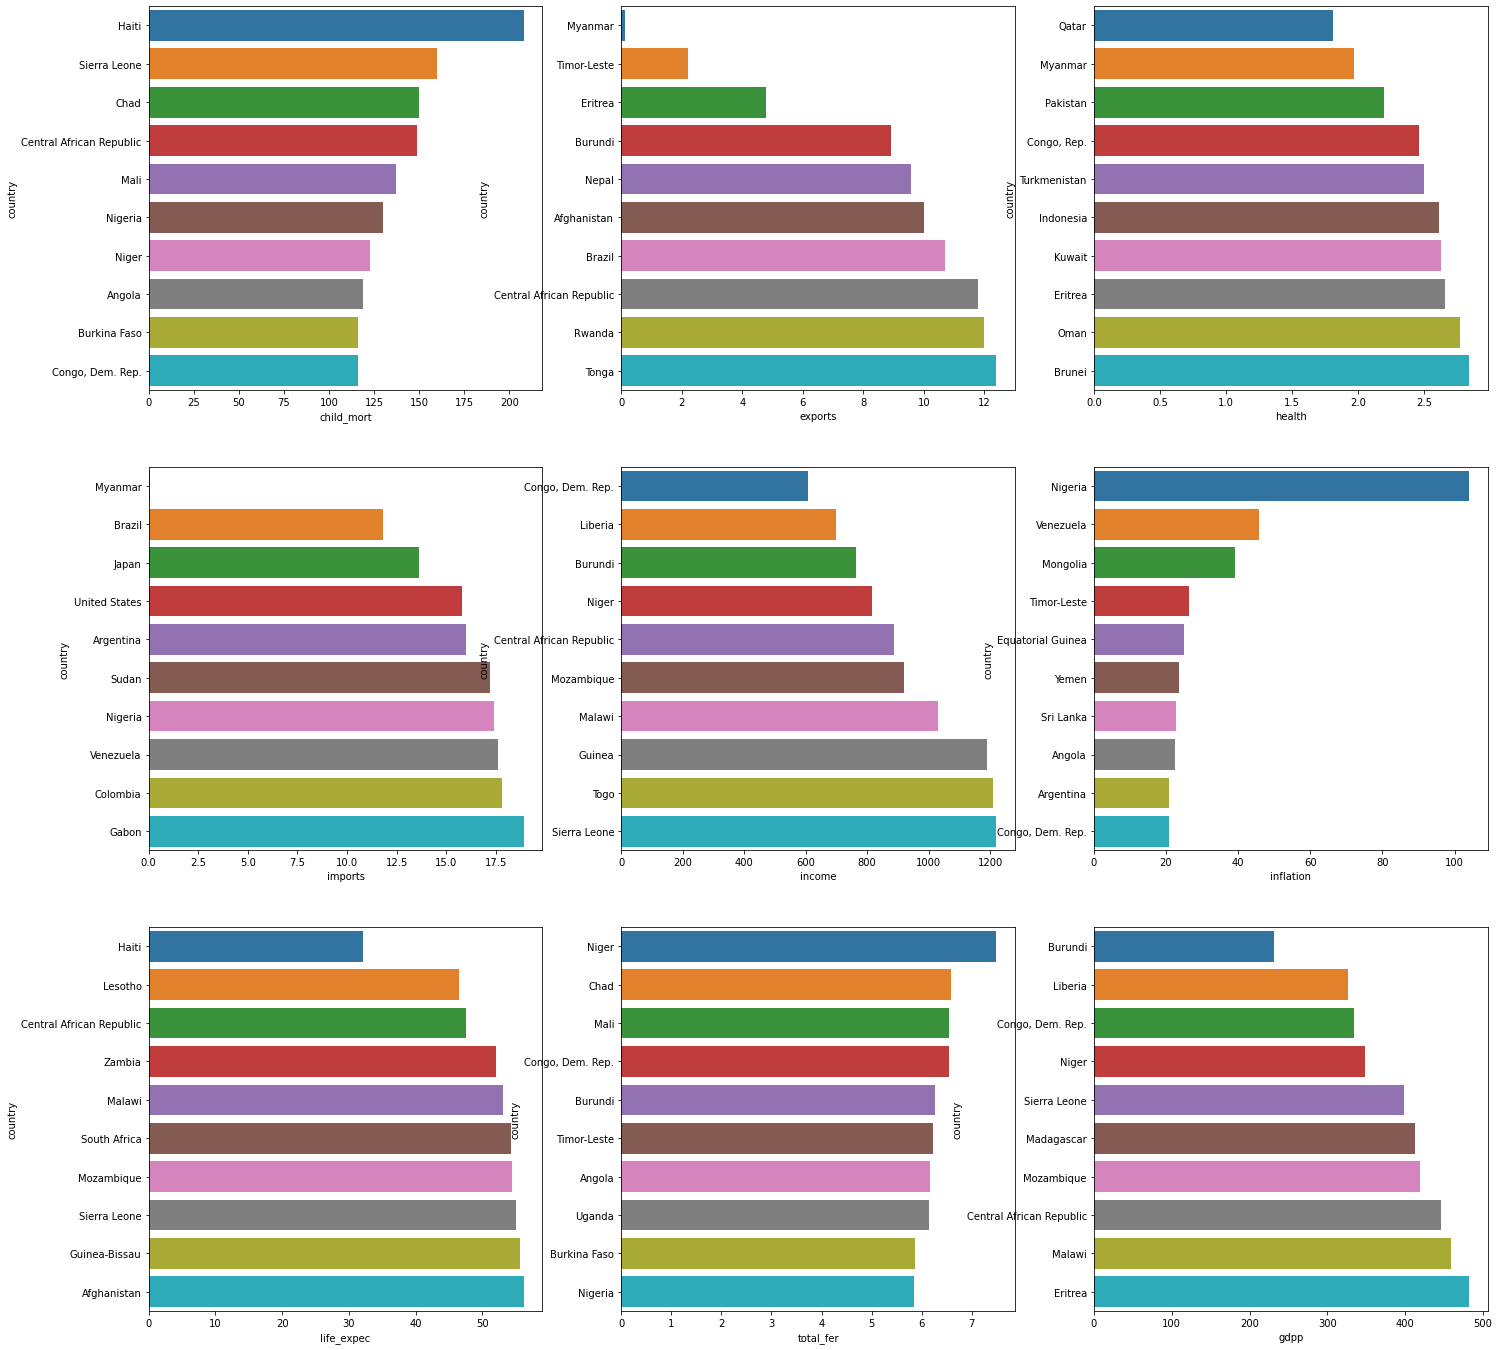

In [ ]:
#Menampilkan barplot untuk data numerical terhadap kolom country
fig, ax = plt.subplots(3, 3, figsize=(24,24))
data = df.sort_values(by=["child_mort"], ascending=False)
sns.barplot(data=data[:10], x="child_mort", y="country", ax=ax[0][0])

data = df.sort_values(by=["exports"], ascending=True)
sns.barplot(data=data[:10], x="exports", y="country", ax=ax[0][1])

data = df.sort_values(by=["health"], ascending=True)
sns.barplot(data=data[:10], x="health", y="country", ax=ax[0][2])

data = df.sort_values(by=["imports"], ascending=True)
sns.barplot(data=data[:10], x="imports", y="country", ax=ax[1][0])

data = df.sort_values(by=["income"], ascending=True)
sns.barplot(data=data[:10], x="income", y="country", ax=ax[1][1])

data = df.sort_values(by=["inflation"], ascending=False)
sns.barplot(data=data[:10], x="inflation", y="country", ax=ax[1][2])

data = df.sort_values(by=["life_expec"], ascending=True)
sns.barplot(data=data[:10], x="life_expec", y="country", ax=ax[2][0])

data = df.sort_values(by=["total_fer"], ascending=False)
sns.barplot(data=data[:10], x="total_fer", y="country", ax=ax[2][1])

data = df.sort_values(by=["gdpp"], ascending=True)
sns.barplot(data=data[:10], x="gdpp", y="country", ax=ax[2][2])

In [ ]:
#Melihat Korelasi/Hubungan antar Kolom
df.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


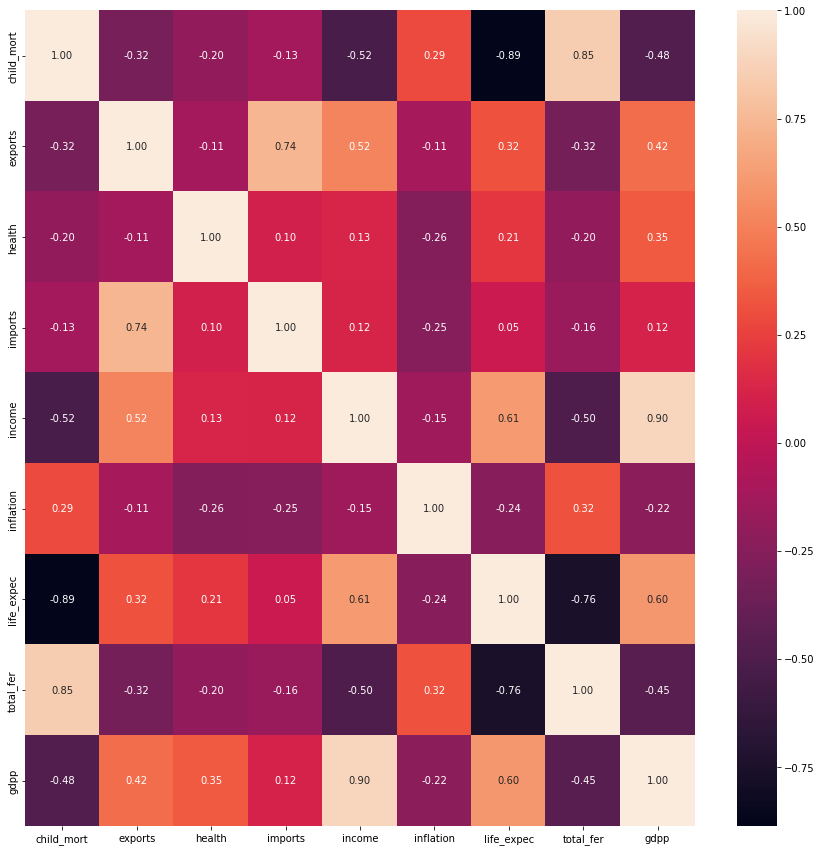

In [ ]:
#Melihat korelasi antar kolom dalam bentuk heatmap
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.show()

#Data Preparation and Cleaning

## Menghapus baris duplikat

In [ ]:
#Menghapus baris duplikat
df = df[~df.duplicated()]

In [ ]:
#Mengecek jumlah baris dan kolom setelah menghapus baris duplikat
df.shape

(167, 10)

Tidak ditemukan data duplikat, sehingga jumlah data tetap sama yaitu 167

## Mengecek missing values

In [ ]:
#Mengecek missing values
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Tidak ditemukan missing values pada data

## Outliers handling

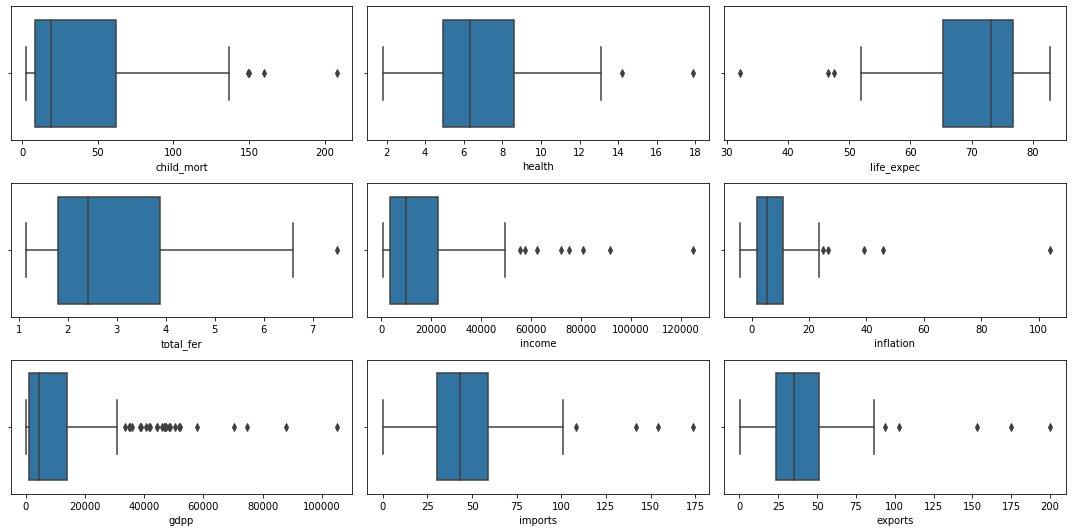

In [ ]:
#Mendeteksi outliers dengan menggunakan boxplot
fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(df['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(df['health'], ax = axs[0,1])
plt3 = sns.boxplot(df['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(df['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(df['income'], ax = axs[1,1])
plt6 = sns.boxplot(df['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(df['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(df['imports'], ax = axs[2,1])
plt9 = sns.boxplot(df['exports'], ax = axs[2,2])

plt.tight_layout()

In [ ]:
df2 = df.copy()
df2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
#Membuat fungsi outliers untuk mengatasi outliers
def outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3-Q1
  lower_bound = Q1-1.5*IQR
  upper_bound = Q3+1.5*IQR

  for i in range(len(df)):
      if df[column].iloc[i] > upper_bound:
          df[column].iloc[i] = upper_bound
      if df[column].iloc[i] < lower_bound:
          df[column].iloc[i] = lower_bound

for feature in num_col:
  outliers(df, feature)

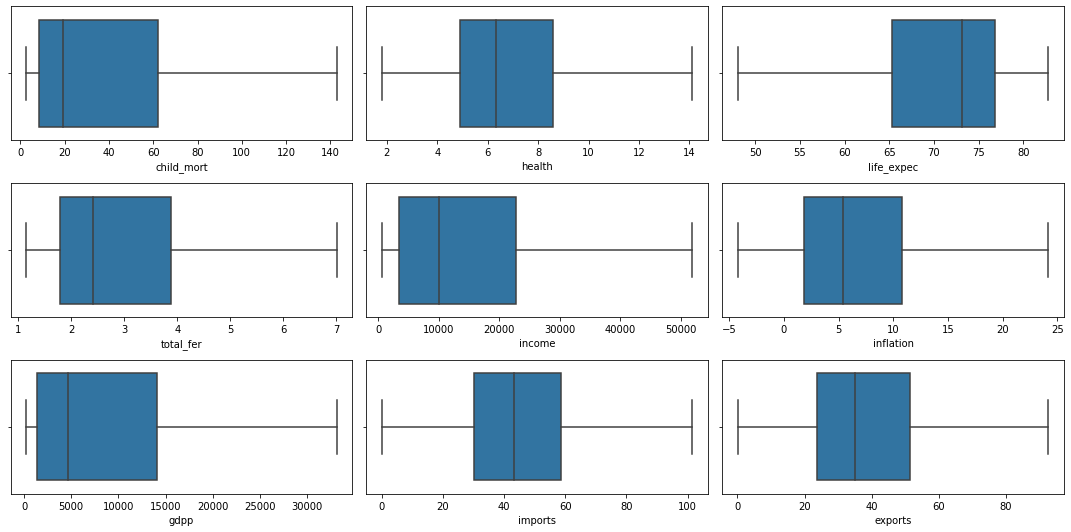

In [ ]:
#Boxplot setelah penanganan outliers
fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(df['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(df['health'], ax = axs[0,1])
plt3 = sns.boxplot(df['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(df['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(df['income'], ax = axs[1,1])
plt6 = sns.boxplot(df['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(df['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(df['imports'], ax = axs[2,1])
plt9 = sns.boxplot(df['exports'], ax = axs[2,2])


plt.tight_layout()

##Feature Selection dan Normalisasi Data

In [ ]:
#Memilih fitur yang akan digunakan
features = df[['child_mort', 'health', 'life_expec', 'total_fer', 'income', 'inflation', 'gdpp', 'imports', 'exports']]

In [ ]:
#Normalisasi data
x = features.values #mengembalikan sebuah numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.62448761, 0.46872461, 0.23453237, 0.79726846, 0.01949044,
        0.48114205, 0.00978753, 0.44167567, 0.10685349],
       [0.09980396, 0.3850528 , 0.81294964, 0.08536065, 0.18148895,
        0.30666197, 0.1172984 , 0.47812561, 0.30130934],
       [0.17608269, 0.19171405, 0.81870504, 0.29705506, 0.23931774,
        0.71589707, 0.12854494, 0.30868267, 0.4136616 ],
       [0.82979861, 0.08448416, 0.34676259, 0.8553137 , 0.10302092,
        0.93796264, 0.1002766 , 0.42197301, 0.67185576],
       [0.05489218, 0.34281072, 0.82733813, 0.16730687, 0.36003777,
        0.19915404, 0.36381045, 0.57959434, 0.49036363]])

# Modelling

##Clustering with Scipy

In [ ]:
#Clustering dengan Scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng, leng])
for i in range(leng):
  for j in range(leng):
    D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

##Model

In [ ]:
#Membuat variabel untuk masing-masing model
X = hierarchy.linkage(D, 'single')
Y = hierarchy.linkage(D, 'average')
Z = hierarchy.linkage(D, 'complete')

**a. Single Linkage**

In [ ]:
#Single linkage dengan 5 cluster
k = 5
clusters = fcluster(X, k, criterion='maxclust')
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

**b. Average Linkage**

In [ ]:
#Average linkage dengan 5 cluster
k = 5
clusters2 = fcluster(Y, k, criterion='maxclust')
clusters2

array([4, 3, 3, 4, 3, 3, 3, 2, 2, 3, 2, 2, 3, 3, 3, 2, 3, 4, 3, 3, 3, 3,
       3, 2, 3, 4, 4, 3, 4, 2, 3, 4, 4, 3, 3, 3, 4, 4, 4, 3, 4, 3, 2, 2,
       2, 3, 3, 3, 3, 5, 4, 3, 3, 2, 2, 3, 4, 3, 2, 4, 2, 3, 3, 4, 4, 3,
       4, 3, 2, 3, 3, 3, 3, 2, 2, 2, 3, 2, 3, 3, 4, 4, 2, 3, 3, 3, 3, 4,
       4, 3, 3, 2, 3, 4, 4, 3, 3, 4, 1, 4, 3, 4, 3, 3, 3, 3, 4, 4, 3, 3,
       2, 2, 4, 4, 2, 2, 4, 3, 3, 3, 3, 3, 2, 2, 3, 3, 4, 3, 2, 4, 3, 1,
       4, 2, 3, 2, 3, 3, 2, 2, 3, 3, 4, 3, 2, 2, 3, 4, 3, 4, 4, 3, 3, 3,
       3, 4, 3, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4], dtype=int32)

**c. Complete Linkage**

In [ ]:
#Complete linkage dengan 5 cluster
k = 5
clusters3 = fcluster(Z, k, criterion='maxclust')
clusters3

array([5, 4, 4, 5, 4, 4, 4, 1, 1, 4, 2, 2, 4, 4, 4, 1, 4, 5, 4, 4, 4, 4,
       4, 1, 4, 5, 5, 4, 5, 1, 4, 5, 5, 4, 4, 4, 5, 5, 5, 4, 5, 4, 2, 2,
       1, 4, 4, 4, 4, 5, 5, 3, 4, 2, 1, 4, 5, 4, 1, 5, 2, 4, 4, 5, 5, 4,
       5, 3, 2, 4, 4, 4, 4, 1, 2, 1, 4, 1, 4, 4, 5, 5, 1, 4, 5, 4, 4, 5,
       5, 3, 3, 1, 4, 5, 5, 3, 3, 5, 3, 5, 4, 5, 4, 4, 4, 4, 5, 5, 4, 4,
       1, 2, 5, 5, 1, 2, 5, 3, 4, 4, 4, 4, 2, 1, 4, 4, 5, 4, 2, 5, 4, 3,
       5, 1, 3, 2, 4, 4, 2, 2, 4, 4, 5, 4, 2, 1, 4, 5, 3, 5, 5, 4, 4, 4,
       4, 5, 4, 1, 2, 1, 4, 4, 4, 4, 4, 5, 5], dtype=int32)

## Plotting Dendrogram

**a. Single Linkage**

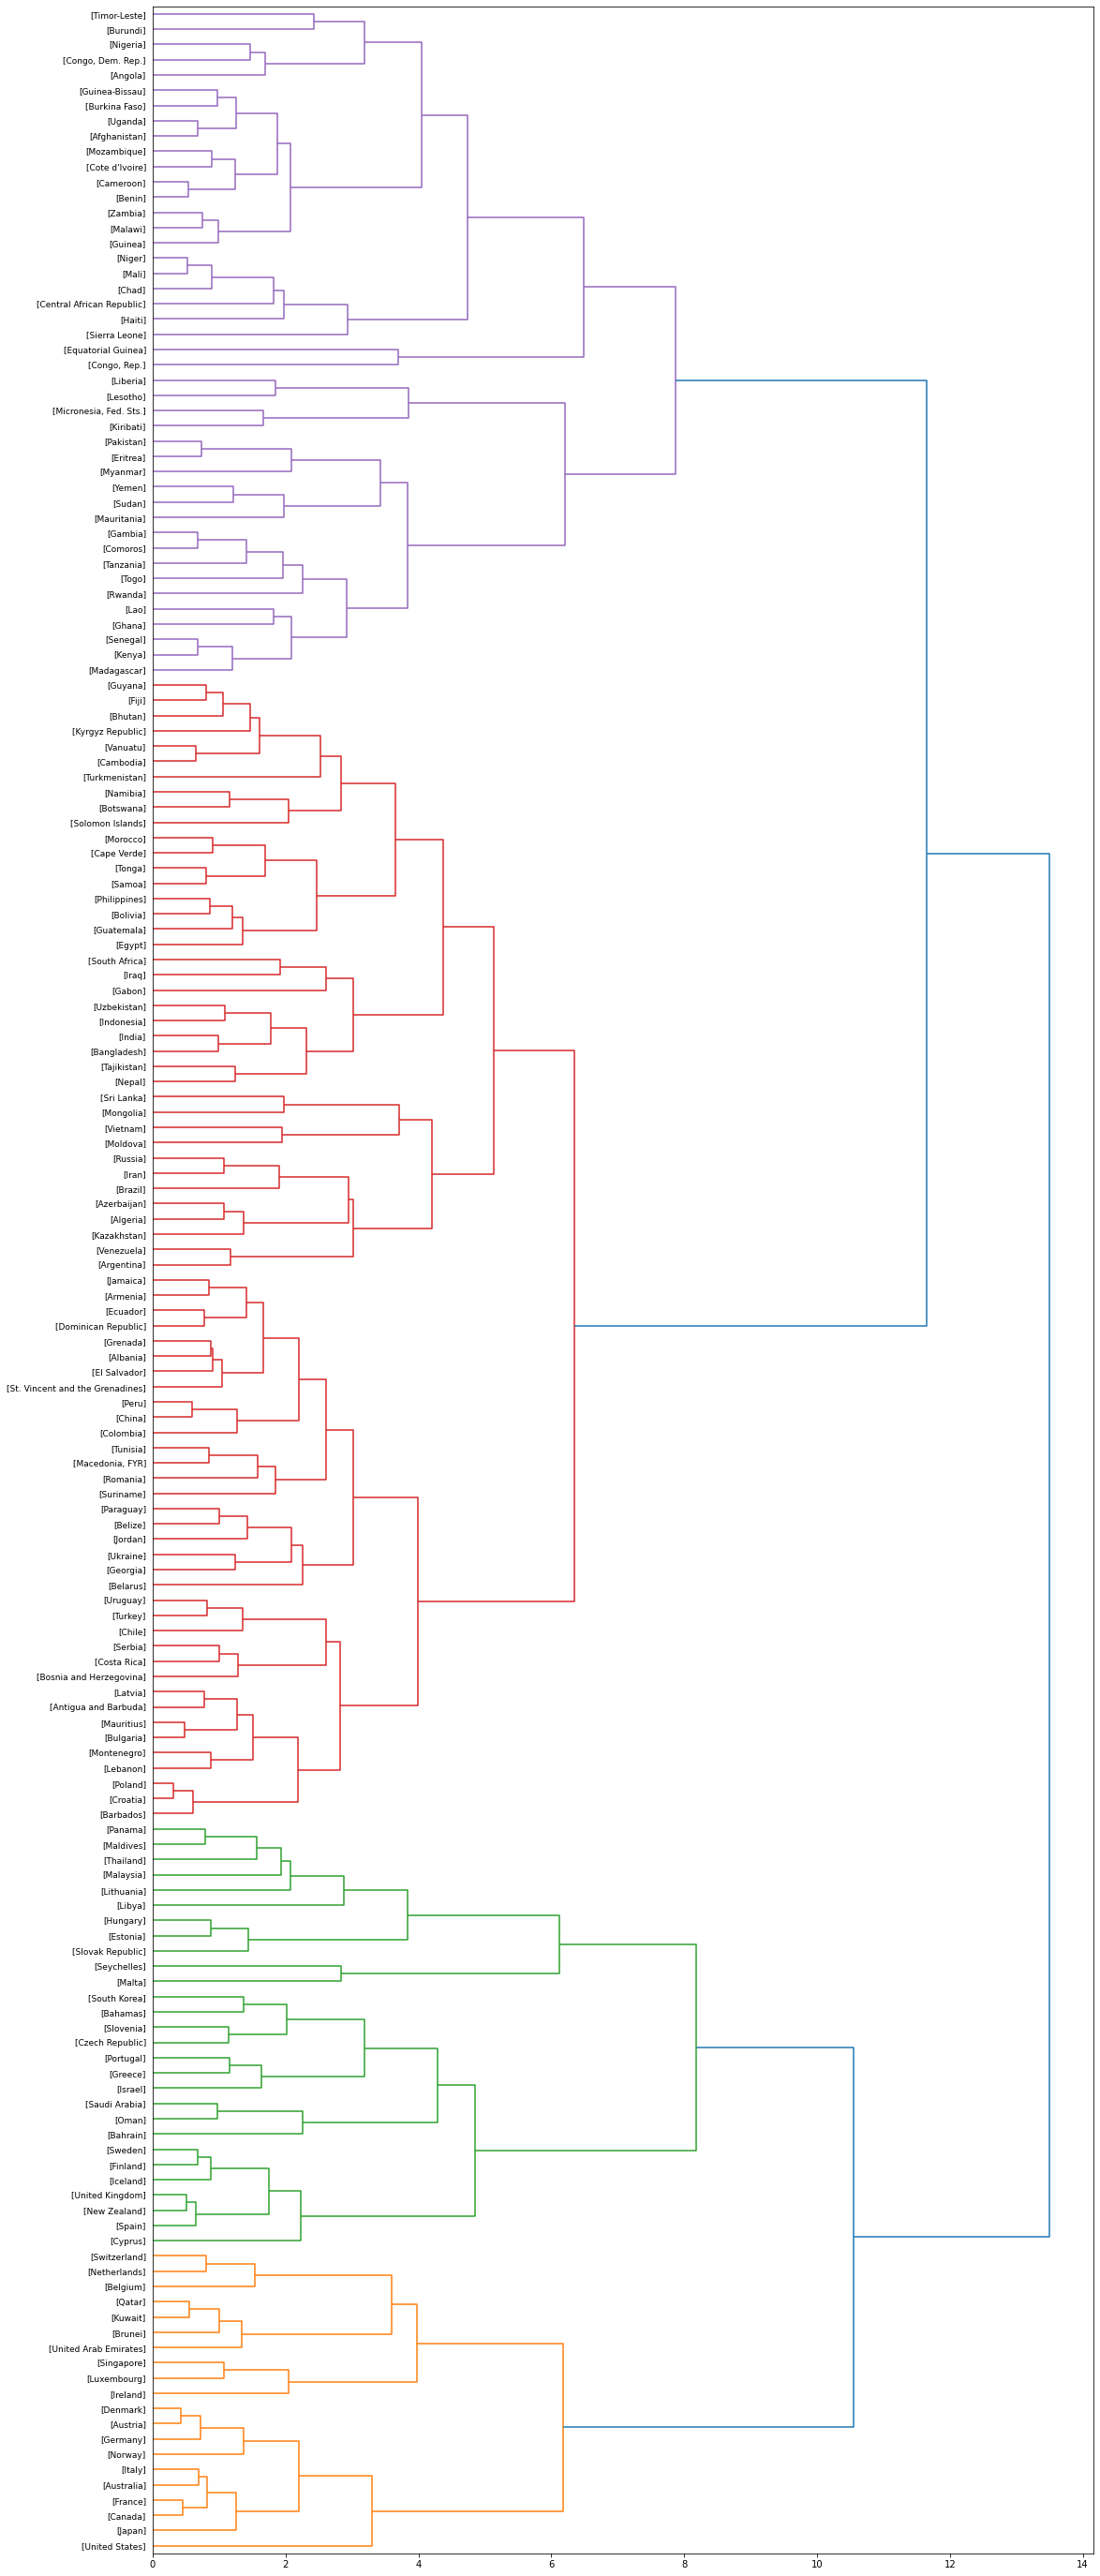

In [ ]:
#Dendrogram untuk single linkage
fig = pylab.figure(figsize=(18,50))
def llf(id):
  return '[%s]' % (df['country'][id])

dendro = hierarchy.dendrogram(Z, leaf_label_func=llf, leaf_rotation=0, leaf_font_size=9, orientation='right')

**b. Average Linkage**

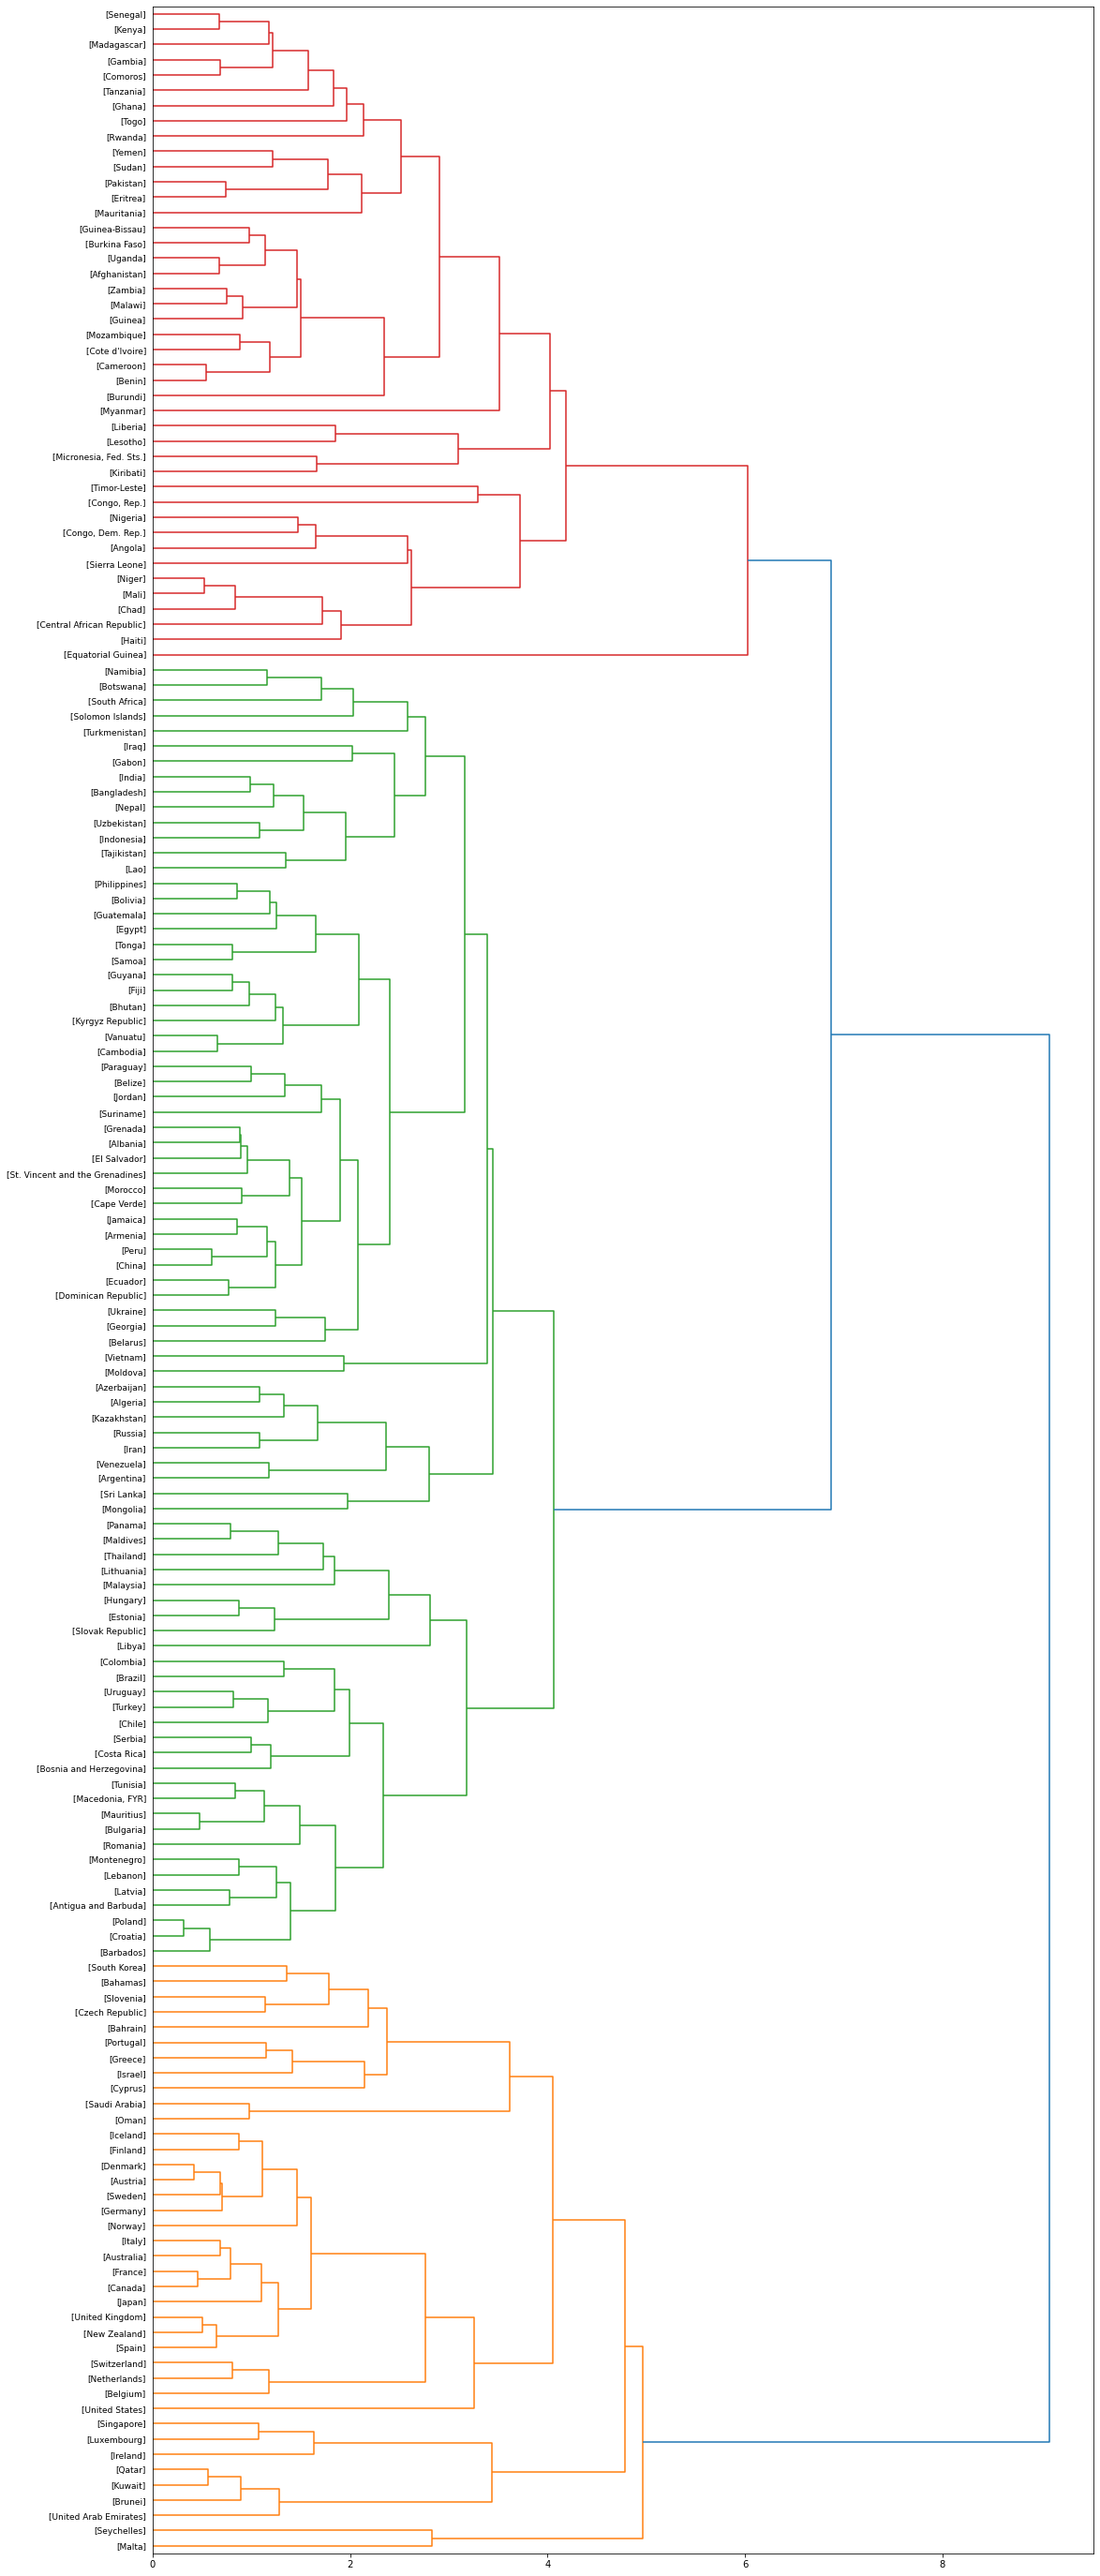

In [ ]:
#Dendogram untuk average linkage
fig = pylab.figure(figsize=(18,50))
def llf(id):
  return '[%s]' % (df['country'][id])

dendro2 = hierarchy.dendrogram(Y, leaf_label_func=llf, leaf_rotation=0, leaf_font_size=9, orientation='right')

**c. Complete Linkage**

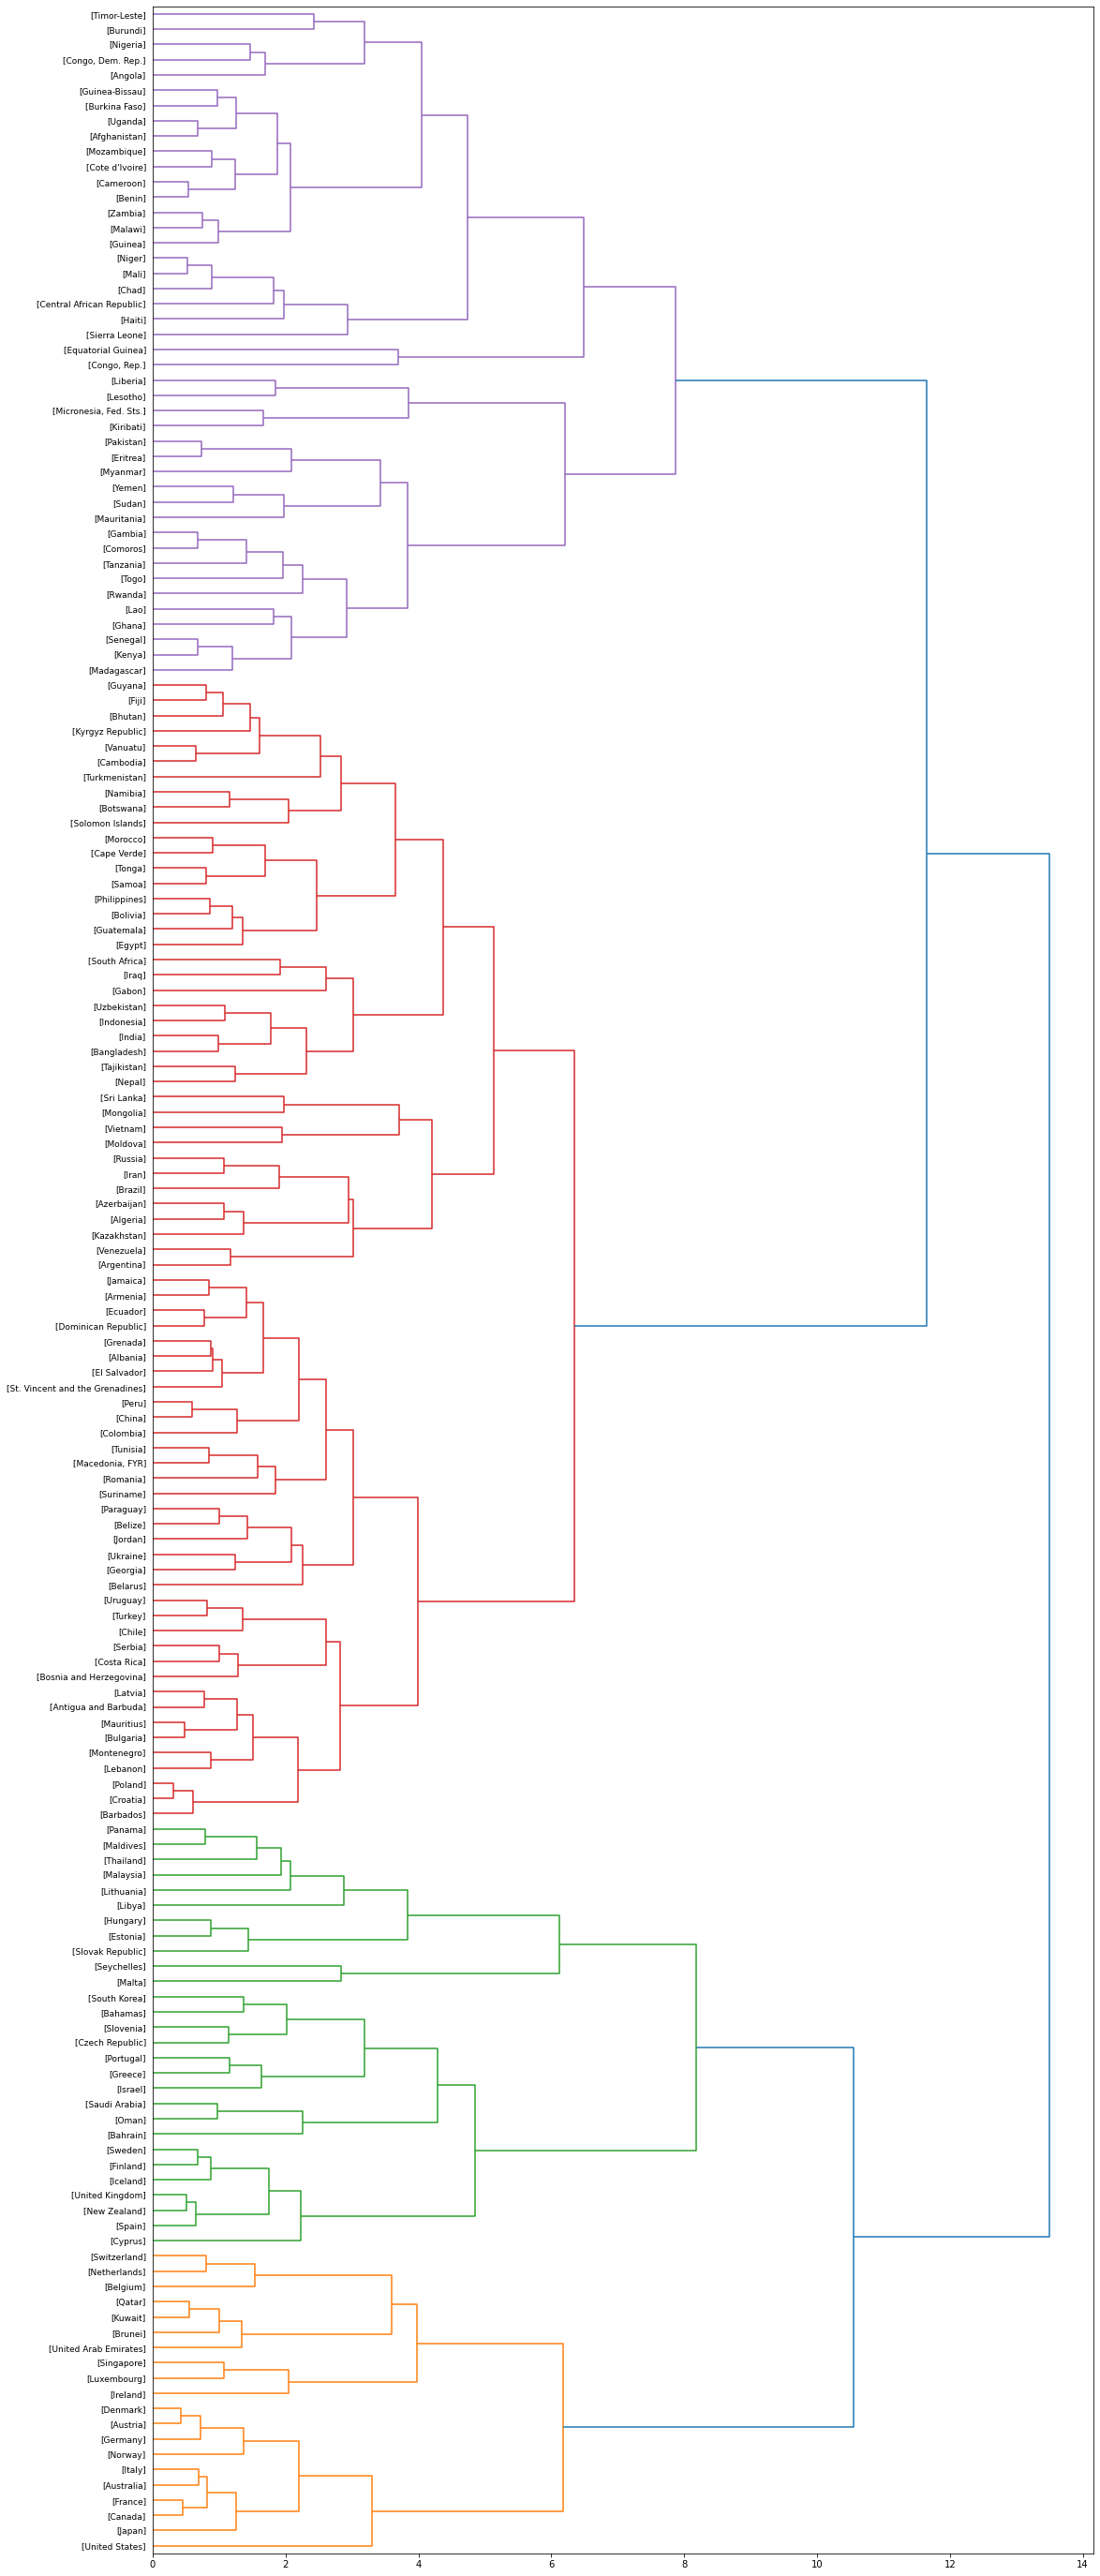

In [ ]:
#Dendrogram untuk complete linkage
fig = pylab.figure(figsize=(18,50))
def llf(id):
  return '[%s]' % (df['country'][id])

dendro3 = hierarchy.dendrogram(Z, leaf_label_func=llf, leaf_rotation=0, leaf_font_size=9, orientation='right')

In [ ]:
df2.hirar = df2.copy()
df2.hirar.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
df2.hirar['cluster'] = clusters3
df2.hirar.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,5
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,4
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,4
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,5
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,4


In [ ]:
df2.hirar.cluster.value_counts()

4    75
5    44
1    20
2    17
3    11
Name: cluster, dtype: int64

In [ ]:
#cluster profiling
df2.hirar.drop(['country','exports','health','imports','inflation','life_expec','total_fer'],axis=1).groupby('cluster').mean()

,child_mort,income,gdpp
cluster,,,
1,5.355000,56015.000000,52590.000000
2,5.900000,34352.941176,29817.647059
3,10.645455,20918.181818,11784.545455
4,24.744000,10643.600000,5527.386667
5,95.700000,2965.750000,1412.045455


In [ ]:
df2.hirar[df2.hirar['cluster']==5]['country']

0                   Afghanistan
3                        Angola
17                        Benin
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
101       Micronesia, Fed. Sts.
106                  Mozambique
107                     Myanmar
112     

In [ ]:
df2.hirar[df2.hirar['cluster']==5].sort_values(by=['child_mort','income','gdpp'],ascending=[False,True,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,5
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,5
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,5
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,5
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,5
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.00,60.5,5.84,2330,5
112,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348,5
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,5
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334,5
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.81,57.9,5.87,575,5
